# 4.10: Coding Etiquette & Excel Reporting

### 1. Data Import
### 2. Check for PII
### 3. Customer behavior based on regions
### 4. Customer activity
### 5. Customer profiling
### 6. Profile visuals
### 7. Min, Max, Mean
### 8. Customer profile comparison
### 9 & 10. Data export 

## Data import

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
orders_products_all = pd.read_pickle (r'/Users/aaronreese/Desktop/Instacart Basket Analysis/2. Data/Prepared Data/cust_ords_prods.pkl')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
orders_products_all.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spender,spending_flag,order_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,income,exists
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,both
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,both
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,both
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,both
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,both


## Question 2: Check for PII

In [6]:
orders_products_all.drop(['first_name','last_name','gender'],axis = 1, inplace = True)

In [7]:
orders_products_all.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spender,spending_flag,order_frequency,frequency_flag,state,age,date_joined,number_of_dependants,income,exists
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both


## Question 3: Customer behavior based on regions

In [8]:
Northeast = ('Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York',
             'Pennsylvania','New Jersey')
Midwest = ('Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas',
           'Minnesota','Iowa','Missouri')
South = ('Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina',
         'Georgia',' Florida','Kentucky','Tennessee','Alabama','Oklahoma','Texas','Arkansas','Louisiana')
West = ('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon',
        'California','Hawaii')

In [9]:
orders_products_all.loc[orders_products_all['state'].isin(Northeast), 'region'] = 'Northeast'
orders_products_all.loc[orders_products_all['state'].isin(Midwest), 'region'] = 'Midwest'
orders_products_all.loc[orders_products_all['state'].isin(South), 'region'] = 'South'
orders_products_all.loc[orders_products_all['state'].isin(West), 'region'] = 'West'

In [10]:
orders_products_all['region'].value_counts(dropna = False)

South        9538925
West         8300445
Midwest      7603810
Northeast    5728347
NaN          1262685
Name: region, dtype: int64

In [11]:
crosstab = pd.crosstab(orders_products_all['region'], orders_products_all['spending_flag'], dropna = False)

In [12]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,7596096,7714
Northeast,5722788,5559
South,9529853,9072
West,8292030,8415


In [13]:
# States in the south region spend the most overall in both the high spender and low spender categories.
# States in the northeast region spend the least in both the high spender and low spender categories.

## Question 4: Customer Activity

In [14]:
orders_products_all.loc[orders_products_all['max_order'] <= 5, 'customer_activity'] = 'Low activity'
orders_products_all.loc[orders_products_all['max_order'] > 5, 'customer_activity'] = 'Active'

In [15]:
orders_products_all['customer_activity'].value_counts(dropna = False)

Active          30198831
Low activity     2235381
Name: customer_activity, dtype: int64

In [16]:
df_all_active = orders_products_all[orders_products_all['customer_activity'] == 'Active']

In [17]:
df_all_active['customer_activity'].value_counts(dropna = False)

Active    30198831
Name: customer_activity, dtype: int64

In [18]:
df_all_active.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spender,spending_flag,order_frequency,frequency_flag,state,age,date_joined,number_of_dependants,income,exists,region,customer_activity
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both,South,Active
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both,South,Active
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both,South,Active
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both,South,Active
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both,South,Active


In [19]:
df_all_active.to_pickle('/Users/aaronreese/Desktop/Instacart Basket Analysis/2. Data/Prepared Data/active_customers.pkl')

## Question 5: Customer Profiling

### Age profile

In [20]:
df_all_active.loc[df_all_active['age'] <= 30, 'age_group'] = 'Young age'
df_all_active.loc[(orders_products_all['age'] >= 31) & (df_all_active['age'] <= 60), 'age_group'] = 'Middle age'
df_all_active.loc[df_all_active['age'] > 61, 'age_group'] = 'Old age'

/var/folders/xg/9wtmprmn2396bpwzl7d3cj9c0000gn/T/ipykernel_37138/3428241431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_active.loc[df_all_active['age'] <= 30, 'age_group'] = 'Young age'


In [21]:
df_all_active['age_group'].value_counts(dropna = False)

Middle age    14185412
Old age        9412233
Young age      6149138
NaN             452048
Name: age_group, dtype: int64

### Income profile

In [22]:
df_all_active['income'].describe()

count    3.019883e+07
mean     9.976761e+04
std      4.318078e+04
min      2.590300e+04
25%      6.741900e+04
50%      9.682000e+04
75%      1.281500e+05
max      5.939010e+05
Name: income, dtype: float64

In [23]:
# Low income = 99,773(mean) - 43,185 (SD) = 56,578
# High income = 99,773 + 43,185 = 142,958
# Middle income is between 56,579 - 142,958

In [24]:
df_all_active.loc[df_all_active['income'] <= 56578, 'income_group'] = 'Low income'
df_all_active.loc[(df_all_active['income'] > 56578 ) & (df_all_active['income'] <= 142958), 'income_group'] = 'Middle income'
df_all_active.loc[df_all_active['income'] > 142958, 'income_group'] = 'High income'

/var/folders/xg/9wtmprmn2396bpwzl7d3cj9c0000gn/T/ipykernel_37138/309389395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_active.loc[df_all_active['income'] <= 56578, 'income_group'] = 'Low income'


In [25]:
df_all_active['income_group'].value_counts(dropna = False)

Middle income    20436712
High income       5033398
Low income        4728721
Name: income_group, dtype: int64

### Department profile

In [26]:
df_depts = pd.read_csv (r'/Users/aaronreese/Desktop/Instacart Basket Analysis/2. Data/Prepared Data/departments_wrangled.csv')

In [27]:
df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [28]:
df_depts = df_depts.rename(columns={'Unnamed: 0' : 'department_id'})

In [29]:
df_depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [30]:
df_all_active.merge(df_depts, on = 'department_id')

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spender,spending_flag,order_frequency,frequency_flag,state,age,date_joined,number_of_dependants,income,exists,region,customer_activity,age_group,income_group,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both,South,Active,Middle age,Low income,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both,South,Active,Middle age,Low income,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both,South,Active,Middle age,Low income,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both,South,Active,Middle age,Low income,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both,South,Active,Middle age,Low income,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30198826,525976,58201,prior,24,6,16,3.0,5161,1,1,Dried Mango,18,10,6.1,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,28,Regular customer,25.0,High spender,27.0,Non-frequent customer,Florida,75,2/8/2019,2,138066,both,NaN,Active,Old age,Middle income,bulk
30198827,758290,58201,prior,26,0,12,9.0,5161,1,1,Dried Mango,18,10,6.1,both,Mid-range product,Busiest day,Regularly busy,Fewest orders,28,Regular customer,25.0,High spender,27.0,Non-frequent customer,Florida,75,2/8/2019,2,138066,both,NaN,Active,Old age,Middle income,bulk
30198828,460711,58201,prior,27,6,9,13.0,5161,1,1,Dried Mango,18,10,6.1,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,28,Regular customer,25.0,High spender,27.0,Non-frequent customer,Florida,75,2/8/2019,2,138066,both,NaN,Active,Old age,Middle income,bulk
30198829,1605789,58201,prior,28,5,7,27.0,5161,1,1,Dried Mango,18,10,6.1,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,28,Regular customer,25.0,High spender,27.0,Non-frequent customer,Florida,75,2/8/2019,2,138066,both,NaN,Active,Old age,Middle income,bulk


In [31]:
df_all_active.loc[df_all_active['department_id'] == (1 or 3 or 4 or 9 or 10 or 12 or 13 or 14 or 15 or 16 or 19 or 20), 'product_group'] = 'Food'
df_all_active.loc[df_all_active['department_id'] == (5 or 7), 'product_group'] = 'Drink'
df_all_active.loc[df_all_active['department_id'] == (18), 'product_group'] = 'Baby care'
df_all_active.loc[df_all_active['department_id'] == (8), 'product_group'] = 'Pet care'
df_all_active.loc[df_all_active['department_id'] == (2 or 11 or 17), 'product_group'] = 'Non-consumable'

/var/folders/xg/9wtmprmn2396bpwzl7d3cj9c0000gn/T/ipykernel_37138/4000144269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_active.loc[df_all_active['department_id'] == (1 or 3 or 4 or 9 or 10 or 12 or 13 or 14 or 15 or 16 or 19 or 20), 'product_group'] = 'Food'


In [32]:
df_all_active['product_group'].value_counts(dropna = False)

NaN               27471505
Food               2060883
Baby care           403066
Drink               139618
Pet care             90344
Non-consumable       33415
Name: product_group, dtype: int64

### Dependents Profile

In [33]:
df_all_active.loc[df_all_active['number_of_dependants'] > 0, 'parental_status'] = 'Parent'
df_all_active.loc[df_all_active['number_of_dependants'] == 0, 'parental_status'] = 'Not a parent'

/var/folders/xg/9wtmprmn2396bpwzl7d3cj9c0000gn/T/ipykernel_37138/3994234299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_active.loc[df_all_active['number_of_dependants'] > 0, 'parental_status'] = 'Parent'


In [34]:
df_all_active['parental_status'].value_counts(dropna = False)

Parent          22652444
Not a parent     7546387
Name: parental_status, dtype: int64

### Combined Profiles

In [35]:
df_all_active.loc[(df_all_active['age_group'] == 'Young age') & (df_all_active['parental_status'] == 'Parent'), 'customer_profile'] = 'Young parent'
df_all_active.loc[(df_all_active['age_group'] == 'Middle age') & (df_all_active['parental_status'] == 'Parent'), 'customer_profile'] = 'Middle aged parent'
df_all_active.loc[(df_all_active['age_group'] == 'Old age') & (df_all_active['parental_status'] == 'Parent'), 'customer_profile'] = 'Old parent'
df_all_active.loc[(df_all_active['age_group'] == 'Young age') & (df_all_active['parental_status'] == 'Not a parent'), 'customer_profile'] = 'Young single'
df_all_active.loc[(df_all_active['age_group'] == 'Middle age') & (df_all_active['parental_status'] == 'Not a parent'), 'customer_profile'] = 'Middle aged single'
df_all_active.loc[(df_all_active['age_group'] == 'Old age') & (df_all_active['parental_status'] == 'Not a parent'), 'customer_profile'] = 'Old single'

/var/folders/xg/9wtmprmn2396bpwzl7d3cj9c0000gn/T/ipykernel_37138/2100538206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_active.loc[(df_all_active['age_group'] == 'Young age') & (df_all_active['parental_status'] == 'Parent'), 'customer_profile'] = 'Young parent'


In [36]:
df_all_active['customer_profile'].value_counts(dropna = False)

Middle aged parent    10644076
Old parent             7066776
Young parent           4615112
Middle aged single     3541336
Old single             2345457
Young single           1534026
NaN                     452048
Name: customer_profile, dtype: int64

## Question 6: Profile Visuals

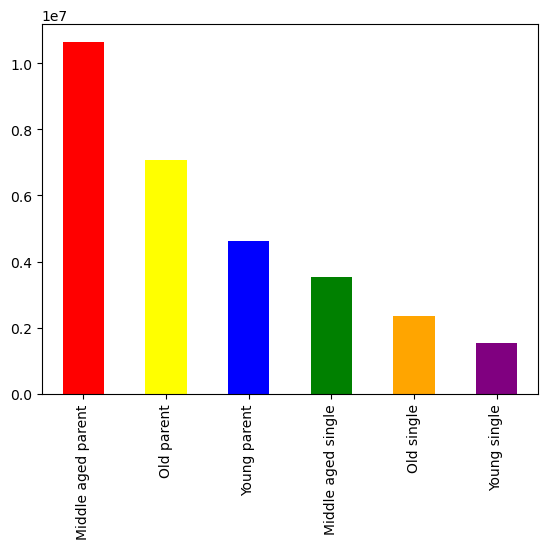

In [37]:
# Customer profiles
customer_profile_bar_chart = df_all_active['customer_profile'].value_counts().plot.bar(color = ['red','yellow','blue','green','orange','purple'])

In [38]:
#Export
customer_profile_bar_chart.figure.savefig((r'/Users/aaronreese/Desktop/Instacart Basket Analysis/4. Analysis/Visualizations/customer_profile_bar_chart.png'))

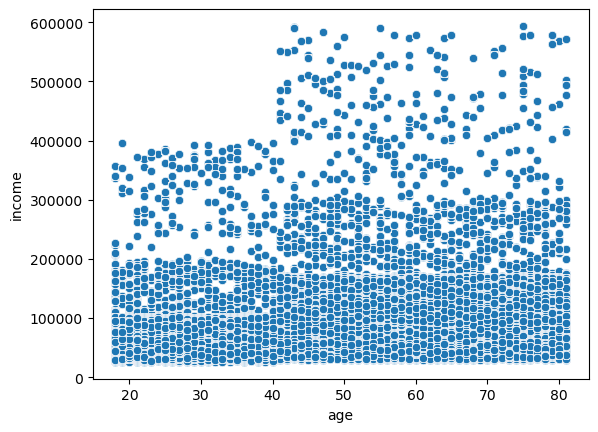

In [62]:
# Customer and income
customer_profile_income = sns.scatterplot(x = 'age', y = 'income',data = df_all_active)

In [63]:
customer_profile_income.figure.savefig((r'/Users/aaronreese/Desktop/Instacart Basket Analysis/4. Analysis/Visualizations/customer_profile_income.png'))

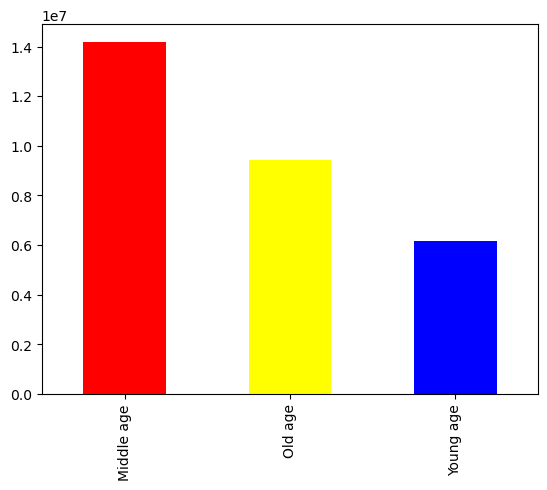

In [39]:
# Age Groups
age_bar_chart = df_all_active['age_group'].value_counts().plot.bar(color = ['red','yellow','blue'])

In [40]:
#Export
age_bar_chart.figure.savefig((r'/Users/aaronreese/Desktop/Instacart Basket Analysis/4. Analysis/Visualizations/age_bar_chart.png'))

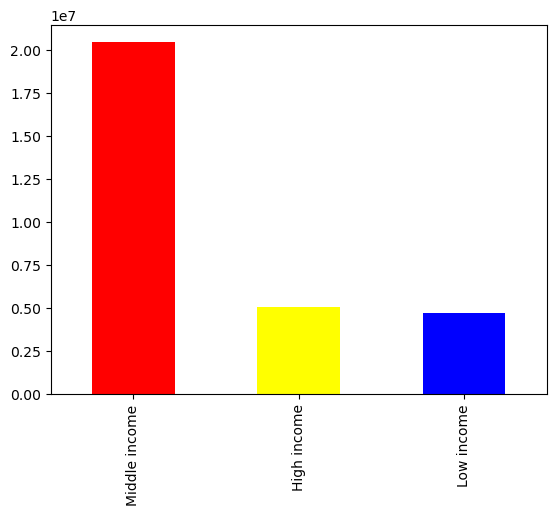

In [41]:
# Income Groups
income_bar_chart = df_all_active['income_group'].value_counts().plot.bar(color = ['red','yellow','blue'])

In [42]:
#Export
income_bar_chart.figure.savefig((r'/Users/aaronreese/Desktop/Instacart Basket Analysis/4. Analysis/Visualizations/income_bar_chart.png'))

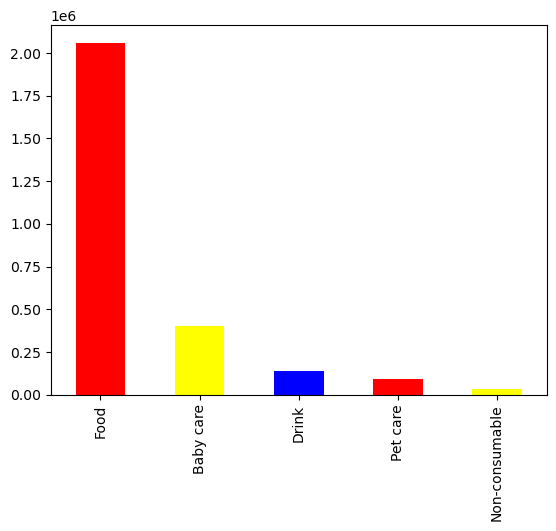

In [43]:
# Department Profile
product_group_bar_chart = df_all_active['product_group'].value_counts().plot.bar(color = ['red','yellow','blue'])

In [44]:
# Export
product_group_bar_chart.figure.savefig((r'/Users/aaronreese/Desktop/Instacart Basket Analysis/4. Analysis/Visualizations/product_group_bar_chart.png'))

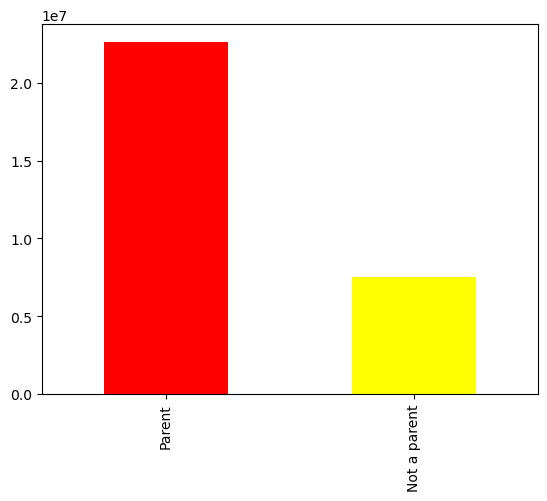

In [45]:
# Dependents profile
parental_status_bar_chart = df_all_active['parental_status'].value_counts().plot.bar(color = ['red','yellow','blue'])

In [46]:
# Export
parental_status_bar_chart.figure.savefig((r'/Users/aaronreese/Desktop/Instacart Basket Analysis/4. Analysis/Visualizations/parental_status_bar_chart.png'))

## Question 7: Max, Min, Mean

In [47]:
df_all_active.groupby('customer_profile').agg({'prices':['min', 'mean', 'max']})

prices                    
                      min       mean      max
customer_profile                             
Middle aged parent    1.0  11.757432  99999.0
Middle aged single    1.0  12.229496  99999.0
Old parent            1.0  11.832924  99999.0
Old single            1.0  11.880189  99999.0
Young parent          1.0  11.894965  99999.0
Young single          1.0  12.362837  99999.0

In [48]:
df_all_active.groupby('customer_profile').agg({'order_frequency':['min', 'mean', 'max']})

order_frequency                 
                               min       mean   max
customer_profile                                   
Middle aged parent             1.0  25.231172  30.0
Middle aged single             0.0  25.113548  30.0
Old parent                     1.0  25.178844  30.0
Old single                     1.0  25.181154  30.0
Young parent                   1.0  25.248417  30.0
Young single                   2.0  25.151484  30.0

## Question 8: Customer Profile Comparision

In [49]:
profile_region = df_all_active.groupby(['region','customer_profile']).size().unstack(fill_value = 0)

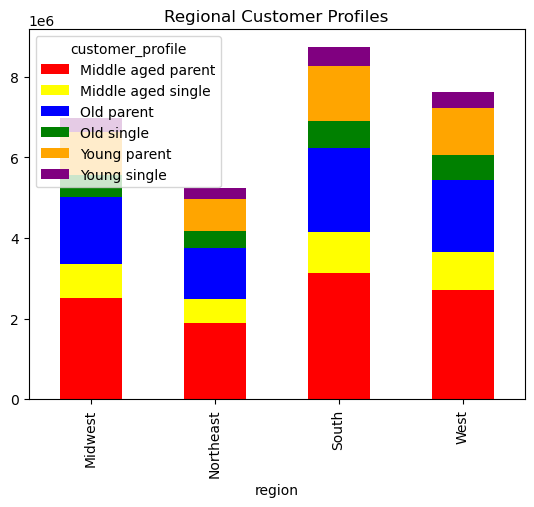

In [50]:
profile_region_bar_chart = profile_region.plot.bar(stacked = True, title = 'Regional Customer Profiles',color = ['red','yellow','blue','green','orange','purple'])

In [51]:
#Export
profile_region_bar_chart.figure.savefig((r'/Users/aaronreese/Desktop/Instacart Basket Analysis/4. Analysis/Visualizations/profile_region_bar_chart.png'))

In [52]:
df_profile_prod_group = df_all_active.groupby(['customer_profile','product_group']).size().unstack(fill_value = 0)

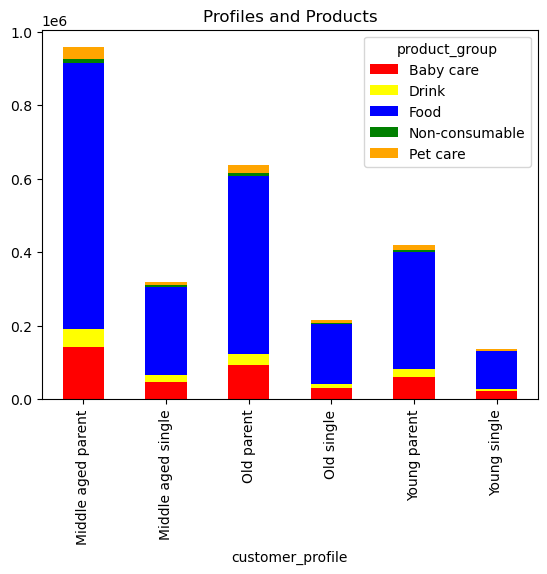

In [53]:
profile_prod_group_bar_chart = df_profile_prod_group.plot.bar(stacked = True, title = 'Profiles and Products',color = ['red','yellow','blue','green','orange','purple'])

In [60]:
profile_prod_group_bar_chart.figure.savefig((r'/Users/aaronreese/Desktop/Instacart Basket Analysis/4. Analysis/Visualizations/profiles_and_products.png'))

In [54]:
# Parents are the largest customer base.
# The south is the region with the most customers.
# A vast majority of sales are of food products to parents.
# This is liekly due to the amount of food these customers need to purchase to feed their dependants.
# Additionally, these customers also purchase the most baby care products.

## Question 10: Export

In [55]:
df_all_active.to_pickle('/Users/aaronreese/Desktop/Instacart Basket Analysis/2. Data/Prepared Data/4-10_all_active_customers.pkl')

In [56]:
profile_region.to_pickle('/Users/aaronreese/Desktop/Instacart Basket Analysis/2. Data/Prepared Data/4-10_profile_region.pkl')

In [57]:
df_profile_prod_group.to_pickle('/Users/aaronreese/Desktop/Instacart Basket Analysis/2. Data/Prepared Data/4-10_profile_product_groups.pkl')

In [59]:
orders_products_all.to_pickle('/Users/aaronreese/Desktop/Instacart Basket Analysis/2. Data/Prepared Data/orders_products_all.pkl')